# Lesson 1 implements dogs vs cats, an example of 2 label classification using what I believe is Resnet trained on imagenet. 

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

/home/karmanya/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/karmanya/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/karmanya/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "/media/ssd_working_space/karmanya/dogscats/"
sz = 224 # (resize size)

In [5]:
!nvidia-smi

Sun Sep 16 20:19:37 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.54                 Driver Version: 396.54                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:0A:00.0 Off |                  N/A |
| 63%   67C    P2   166W / 250W |   1985MiB / 11178MiB |     95%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:0B:00.0 Off |                  N/A |
|100%   91C    P2   140W / 250W |   1285MiB / 11178MiB |     98%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [6]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=2
# Making sure I don't use all the gpus 

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=2


In [7]:
torch.cuda.is_available() and torch.backends.cudnn.enabled

True

In [8]:
_cats = os.listdir(f'{PATH}valid/cats')[:5] # look at the first few pictures of cats
_dogs = os.listdir(f'{PATH}valid/dogs')[:5] # look at the first few pictures of cats

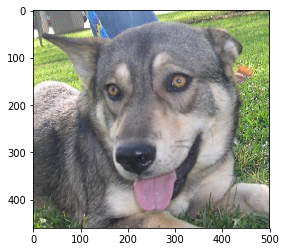

In [9]:
_img = plt.imread(f'{PATH}valid/dogs/{_dogs[0]}')
plt.imshow(_img);

In [10]:
_img.shape # this means 460 px x 500 px x3 channels (RGB)

(460, 500, 3)

In [11]:
arch = resnet34 # We want to use a pretrained model named resnet34
data = ImageClassifierData.from_paths(PATH,tfms=tfms_from_model(arch, sz)) #Load all the data
learner = ConvLearner.pretrained(arch, data, precompute=True) # pass the pretrained model weights (arch), the data, and precompute
learner.fit(0.01, 3) # 99% prediction accuracy of cats vs dogs, though I have a feeling this is overfit somewhat. Not sure if resnet has dropout. 

epoch      trn_loss   val_loss   accuracy                     
    0      0.04851    0.02509    0.9905    
    1      0.038052   0.026305   0.9925                       
    2      0.033506   0.023938   0.9915                       



[array([0.02394]), 0.9915]

# Analysis portion and playing around with the actual data and the library

In [12]:
print(data.val_y) # Labels, 
print(data.classes) # Thus cats are label 0 dogs are label 1

[0 0 0 ... 1 1 1]
['cats', 'dogs']


In [13]:
log_pred = learner.predict() # Make predictions
log_pred[:5] # Predictions are log(p)

array([[ -0.0005 ,  -7.59555],
       [ -0.00152,  -6.48694],
       [ -0.00001, -11.77551],
       [ -0.00001, -11.35696],
       [ -0.00014,  -8.8929 ]], dtype=float32)

In [14]:
preds = np.argmax(log_pred, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_pred[:,1])        # pr(dog)

In [15]:
path2 = '/media/ssd_working_space/karmanya/jj/'

In [16]:
import os
for ind, file in enumerate(os.listdir(f'{path2}valid/heelhook/')):
    os.rename(f'{path2}valid/heelhook/{file}', f'{path2}valid/heelhook/heelhook.{ind}')
import glob
glob.glob(f'{path2}train/heelhook/', recursive=True)

['/media/ssd_working_space/karmanya/jj/train/heelhook/']

In [34]:
arch = resnet34 # We want to use a pretrained model named resnet34
data = ImageClassifierData.from_paths(path2,tfms=tfms_from_model(arch, sz)) #Load all the data
learner = ConvLearner.pretrained(arch, data, precompute=True) # pass the pretrained model weights (arch), the data, and precompute
learner.fit(0.1, 310)

epoch      trn_loss   val_loss   accuracy        
    0      0.905779   0.839534   0.525     
    1      0.647166   0.960873   0.483333        
    2      0.491326   1.07036    0.491667        
    3      0.407745   1.01676    0.558333        
    4      0.324994   1.013966   0.591667        
    5      0.273442   1.04154    0.591667        
    6      0.238819   1.105979   0.616667        
    7      0.208484   1.188205   0.625           
    8      0.184669   1.26306    0.616667        
    9      0.16508    1.340682   0.608333        
    10     0.148572   1.405751   0.608333        
    11     0.135348   1.468195   0.608333        
    12     0.123878   1.519357   0.625           
    13     0.116323   1.573173   0.616667        
    14     0.107875   1.621749   0.608333        
    15     0.100104   1.66293    0.608333        
    16     0.093271   1.693419   0.608333        
    17     0.08819    1.724849   0.616667        
    18     0.082669   1.753486   0.633333        
    19

   162     0.001623   2.174581   0.65            
   163     0.001589   2.176956   0.658333        
   164     0.001557   2.164977   0.641667        
   165     0.001525   2.160554   0.641667        
   166     0.001493   2.171737   0.65            
   167     0.001463   2.153142   0.633333        
   168     0.001433   2.152569   0.633333        
   169     0.001403   2.152431   0.633333        
   170     0.001374   2.159484   0.641667        
   171     0.001346   2.160133   0.633333        
   172     0.00132    2.179344   0.65            
   173     0.001293   2.16349    0.641667        
   174     0.001266   2.15987    0.641667        
   175     0.00124    2.150645   0.633333        
   176     0.001216   2.151586   0.633333        
   177     0.001191   2.15135    0.625           
   178     0.001167   2.148928   0.625           
   179     0.001149   2.155143   0.625           
   180     0.001126   2.16596    0.65            
   181     0.001105   2.165745   0.65            


[array([2.17452]), 0.6249999880790711]

In [35]:
log_pred = learner.predict()
preds = np.argmax(log_pred, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_pred[:,1])        # pr(dog)

In [36]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [41]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(path2+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

In [39]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

Correctly classified


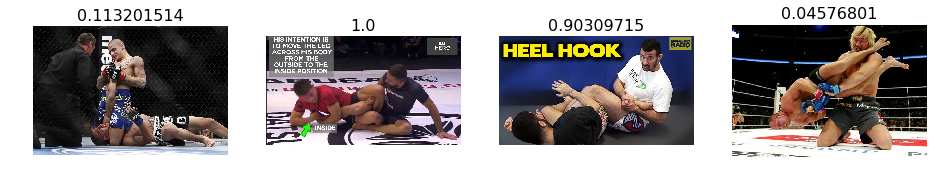

In [42]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


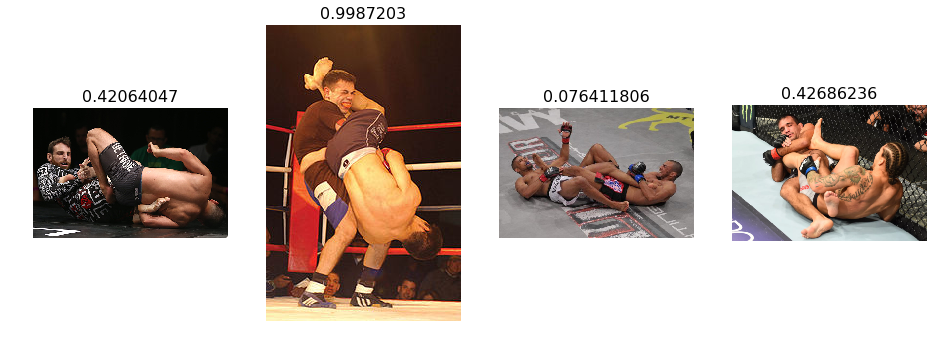

In [43]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [44]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


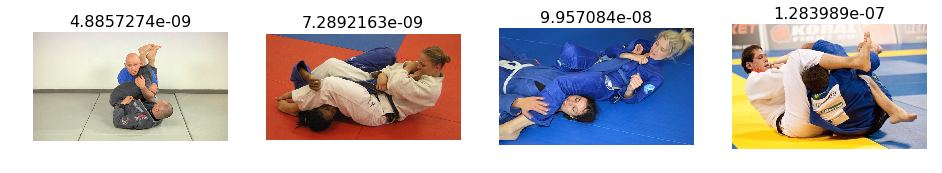

In [45]:
plot_val_with_title(most_by_correct(0, True), "Most correct armbars")

Most correct heelhooks


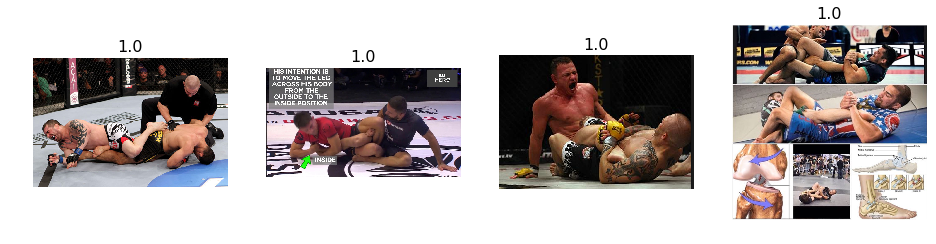

In [47]:
plot_val_with_title(most_by_correct(1, True), "Most correct heelhooks")

Most incorrect heelhooks


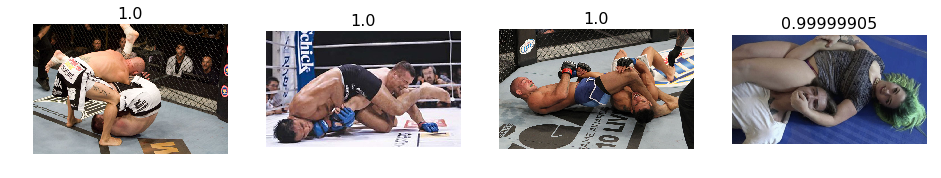

In [49]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect armbars")

Most incorrect heelhooks


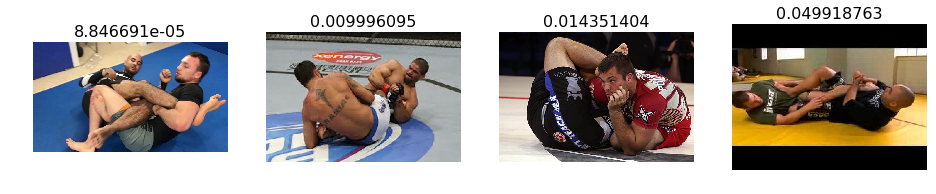

In [50]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect heelhooks")

Most uncertain predictions


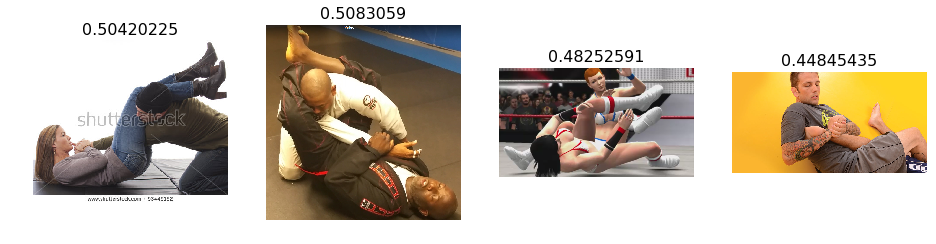

In [51]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")